We conducted sensitivity analyses to examine the impact of data preprocessing on modeling and prediction using GPR, as demonstrated in Examples 1 and 2, respectively. 
First, we performed sensitivity analyses for data preprocessing in modeling the spread using GPR for the simulation in Example~1. In addition to using a 30-day smoothing window and a 7-day difference on the logarithmic scale of infected cases, we conducted two types of sensitivity analysis.

1. Varying Smoothing Window: We fixed the 7-day difference on the logarithmic scale and varied the 30-day smoothing window to 1, 3, 5, 10, 20, 30, and 50 days, using the same GPR method to model the data.

2. Varying Log Differences: We fixed the 30-day smoothing window and varied the 7-day difference to 3, 7, 14, and 28 days, comparing the modeling results using the same GPR approach.


1. The sensitivity analysis of modeling the spread using smoothing windows of 1, 3, 5, 10, 20, 30, and 50 days.

<>:64: SyntaxWarning: invalid escape sequence '\D'
<>:64: SyntaxWarning: invalid escape sequence '\D'
C:\Users\bshe6\AppData\Local\Temp\1\ipykernel_1028\823487370.py:64: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta_7$ (Log Differences)', fontsize=35)


Window Size: 1 days
  MSE: 0.0006
  Percentage of data within 95% CI: 92.48%


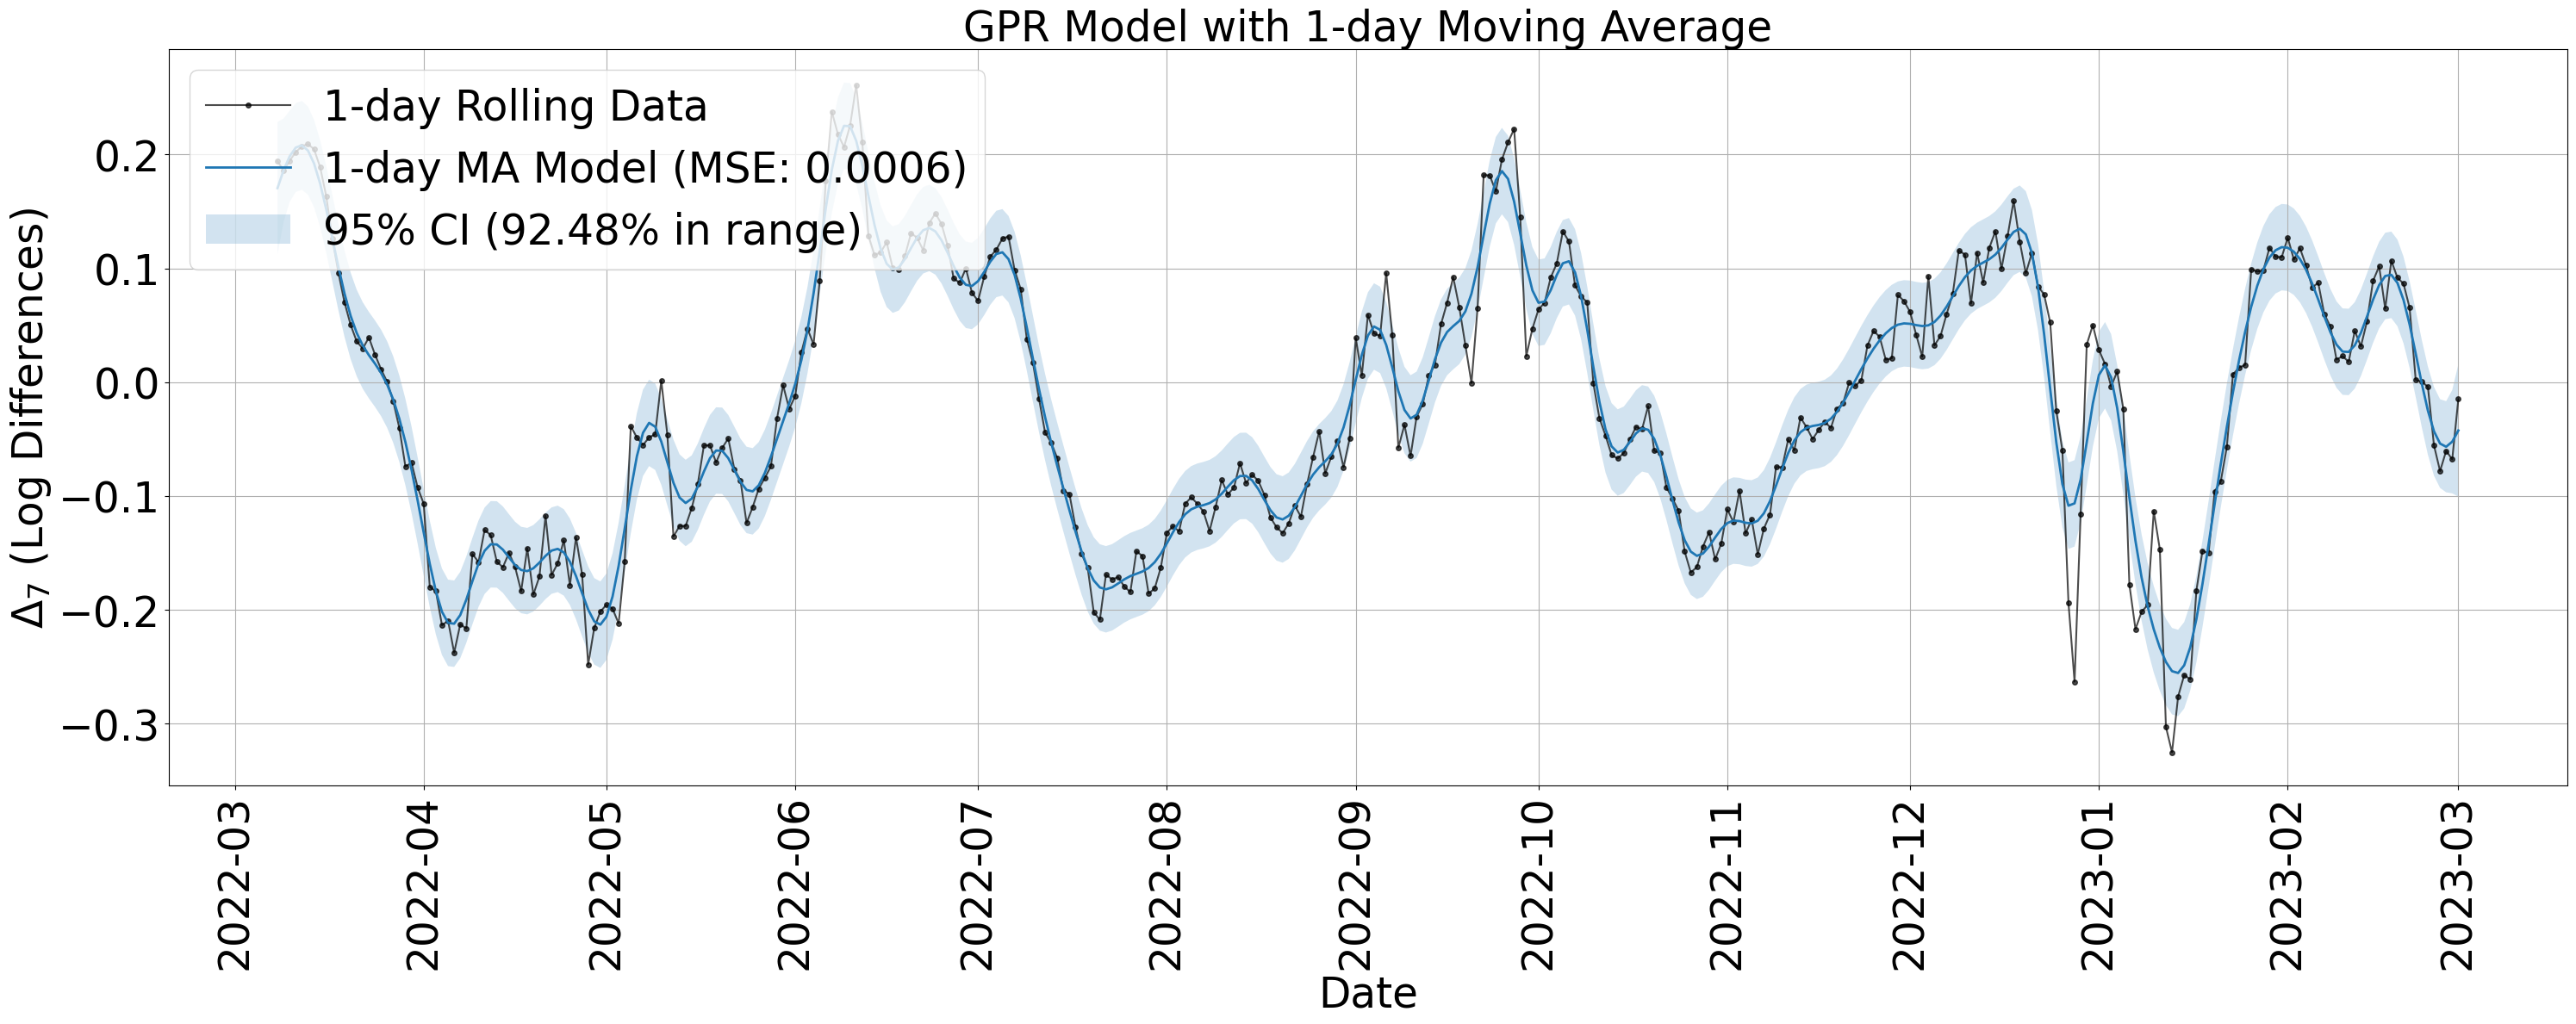

Window Size: 3 days
  MSE: 0.0003
  Percentage of data within 95% CI: 93.84%


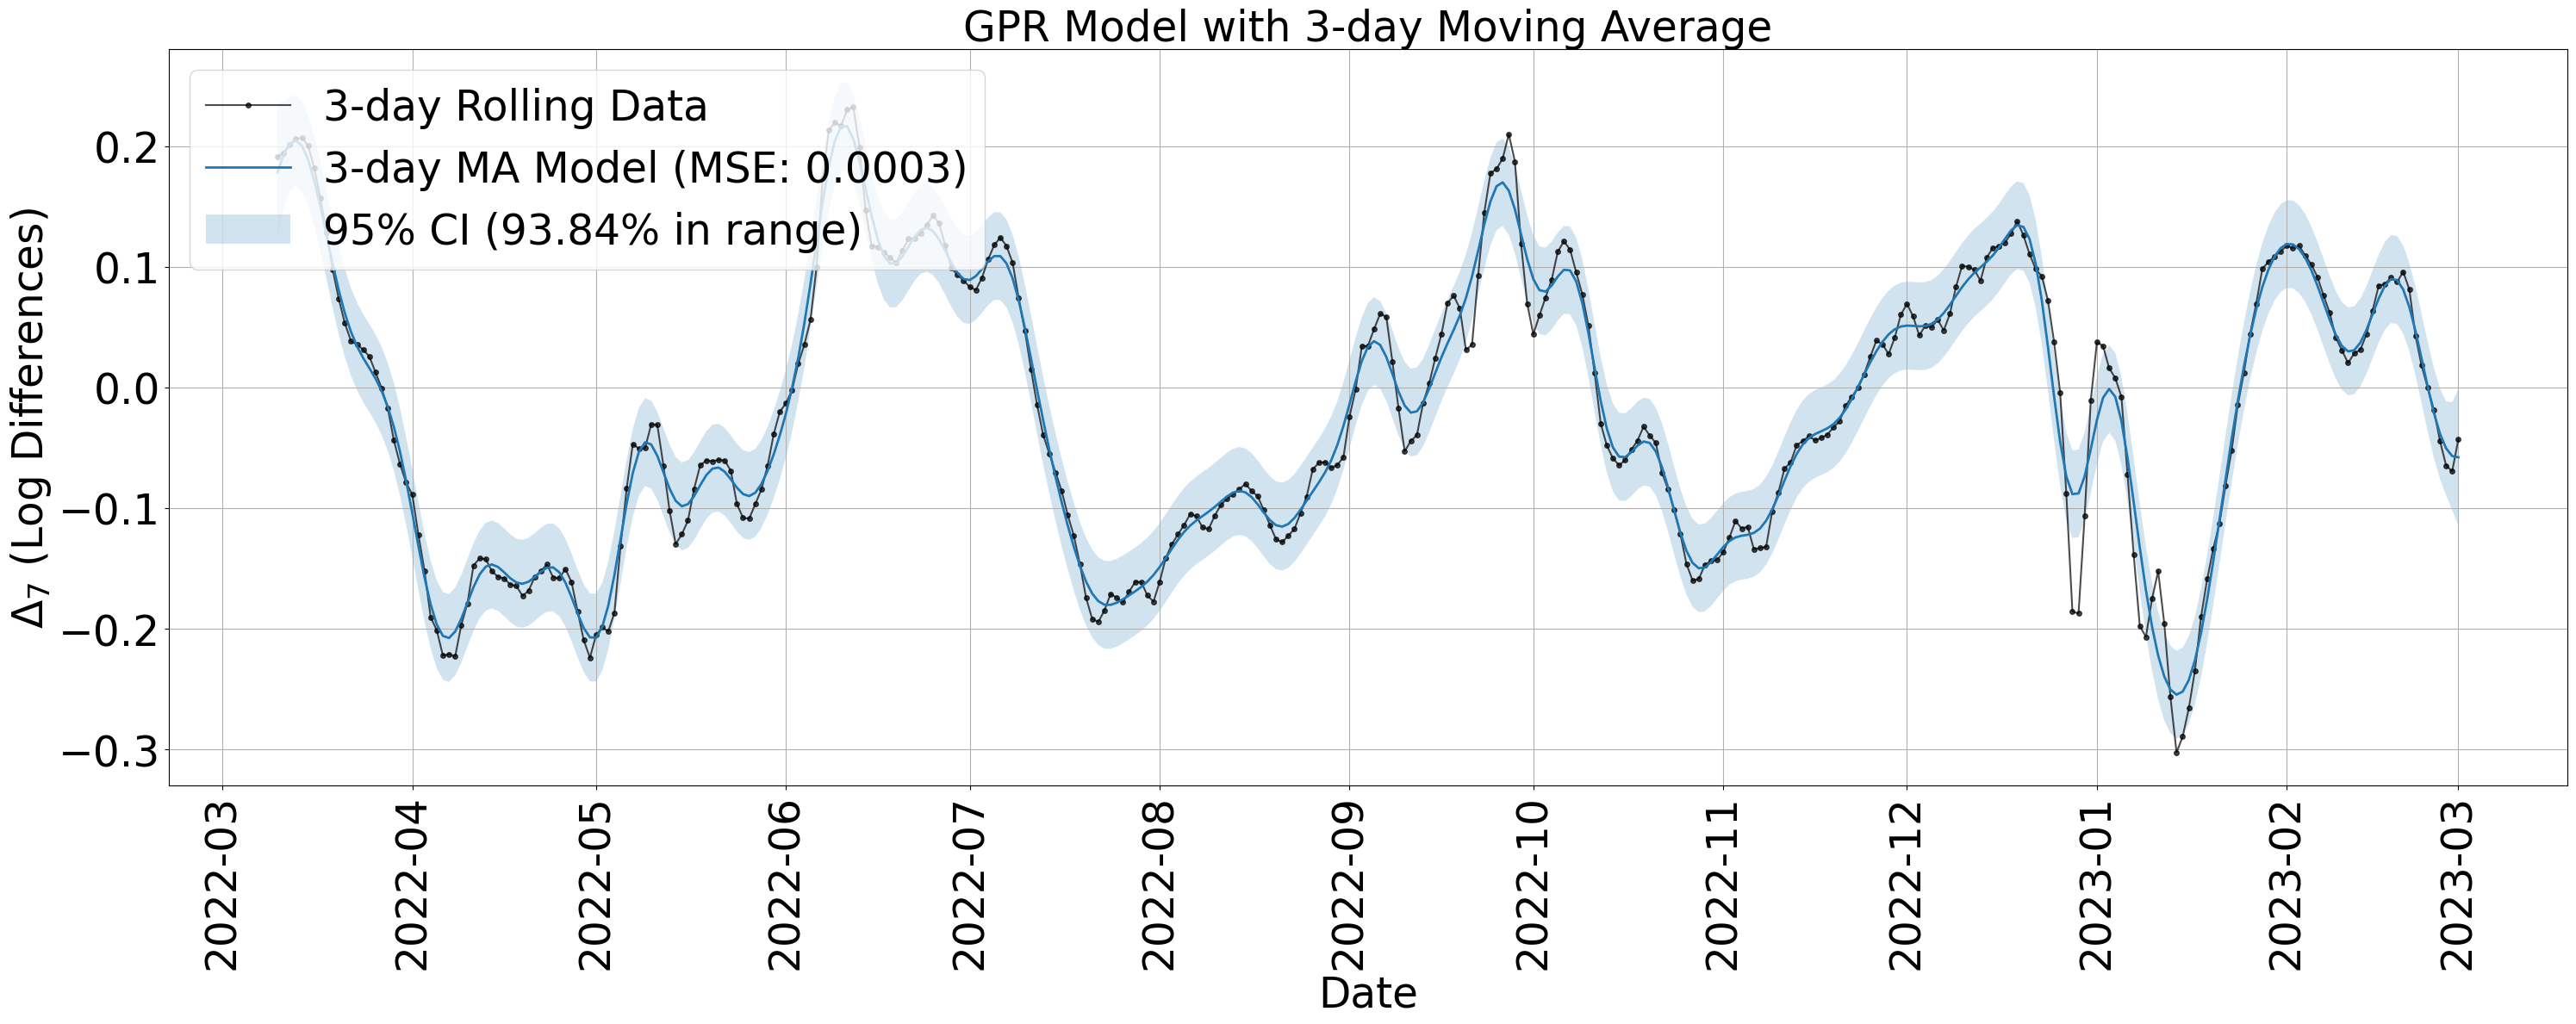

Window Size: 5 days
  MSE: 0.0003
  Percentage of data within 95% CI: 94.37%


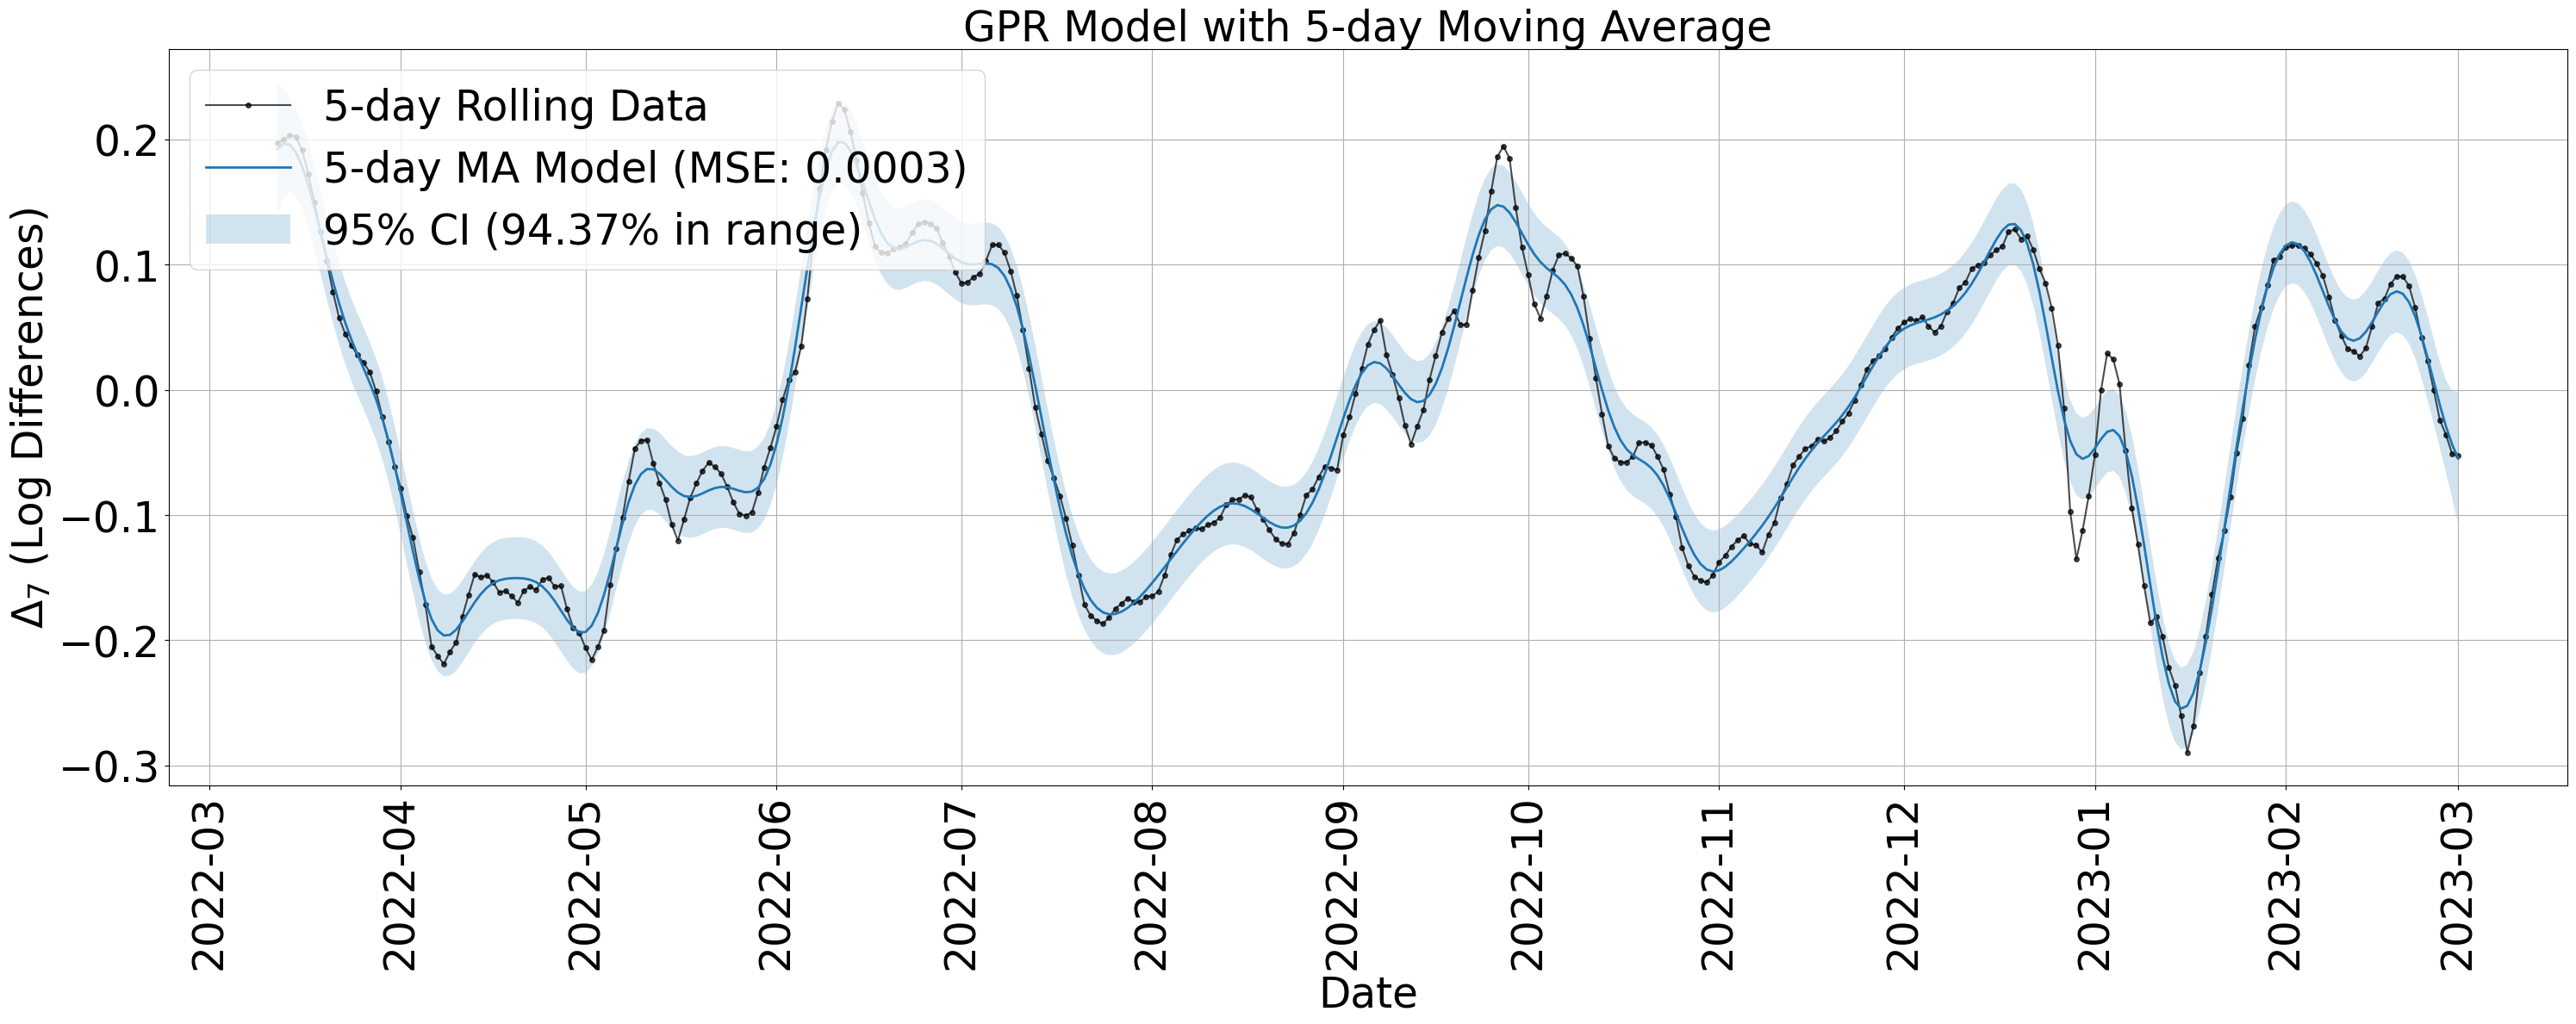

Window Size: 10 days
  MSE: 0.0001
  Percentage of data within 95% CI: 99.14%


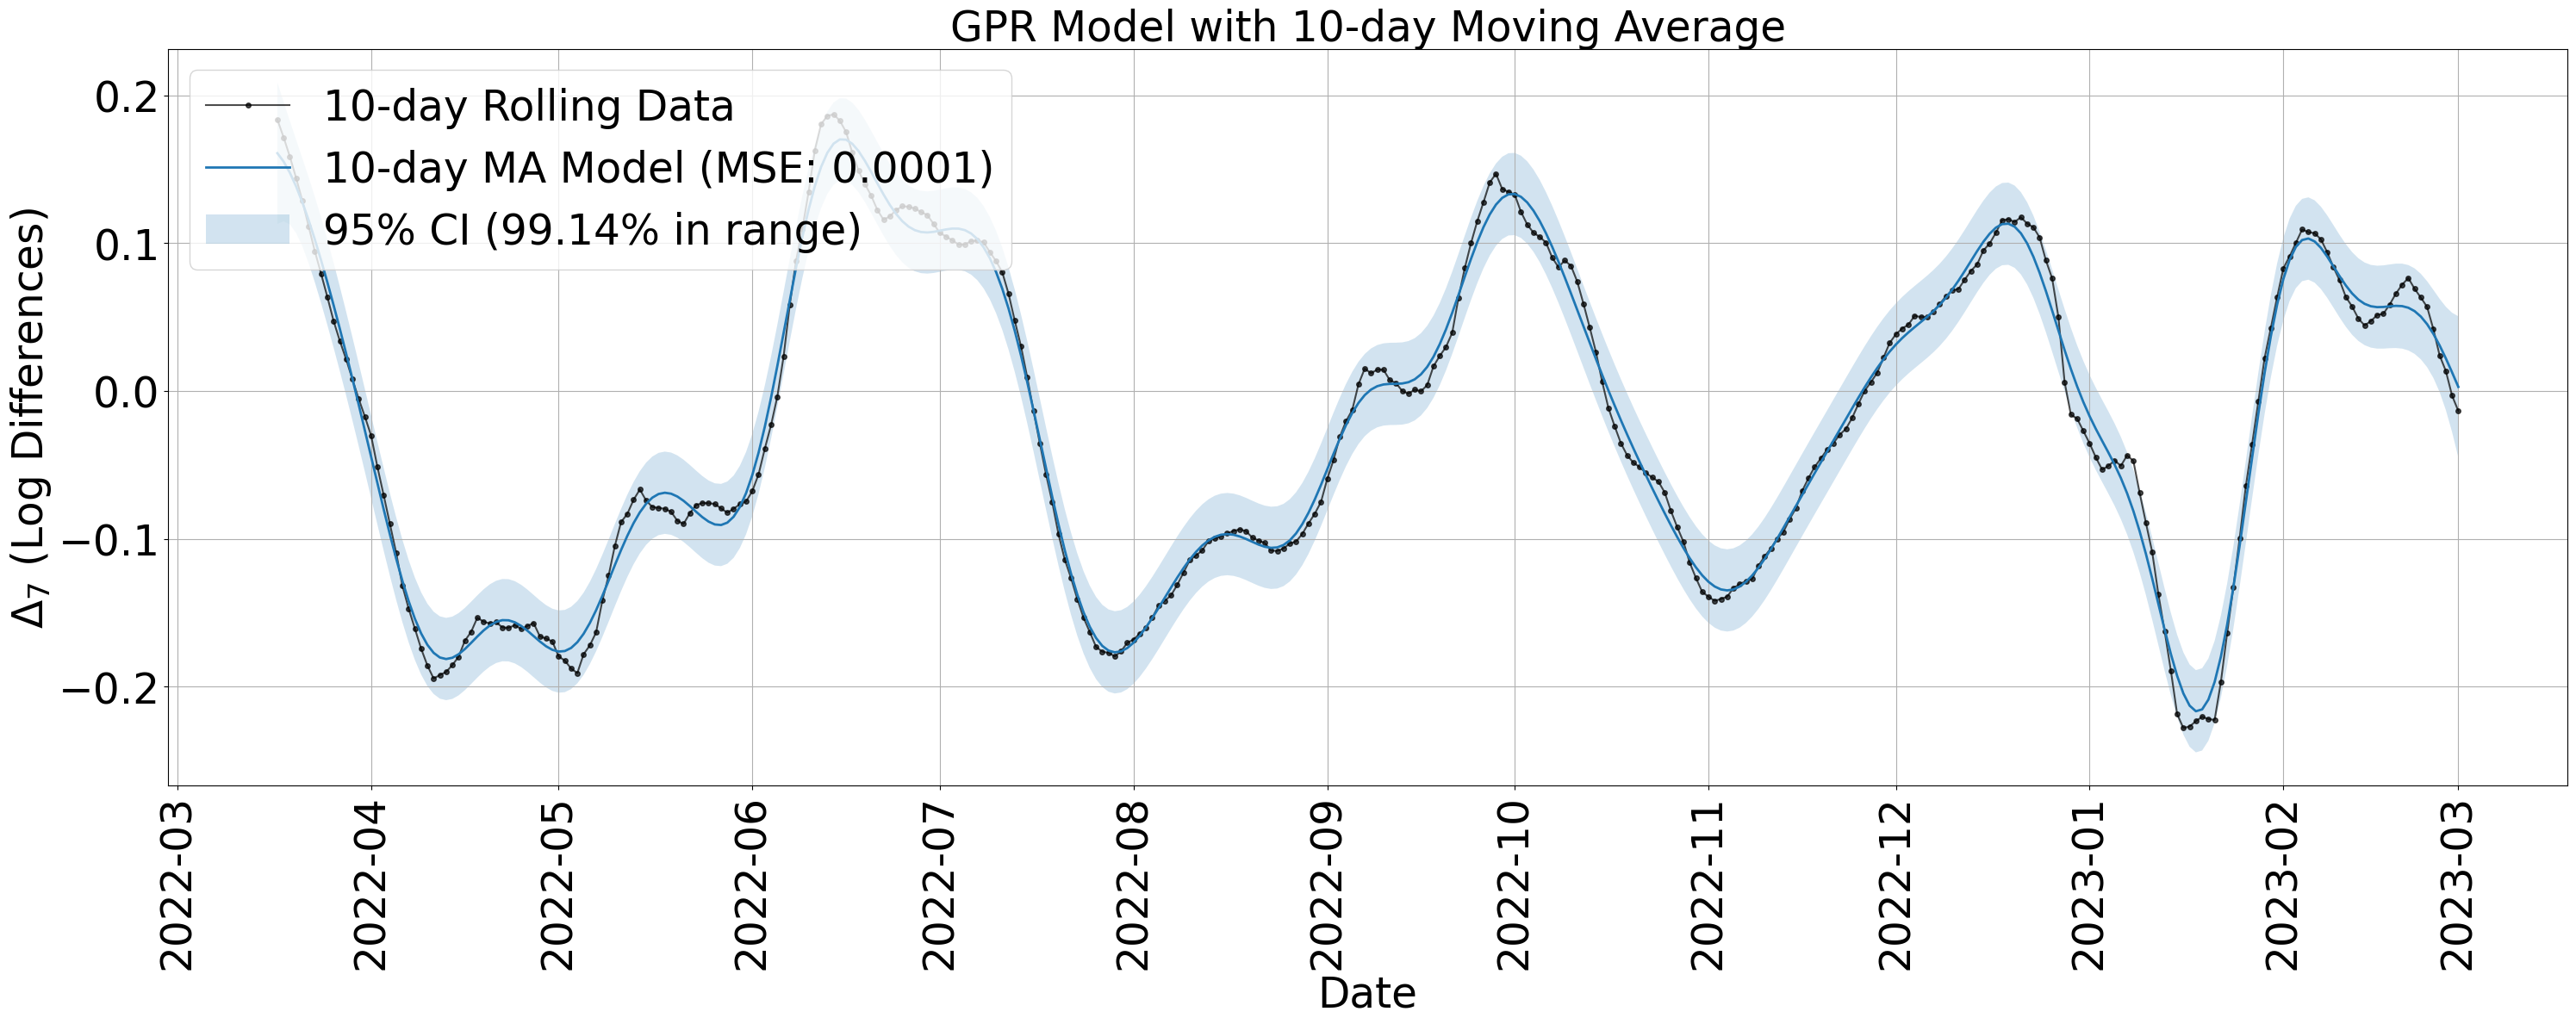

Window Size: 20 days
  MSE: 0.0001
  Percentage of data within 95% CI: 94.71%


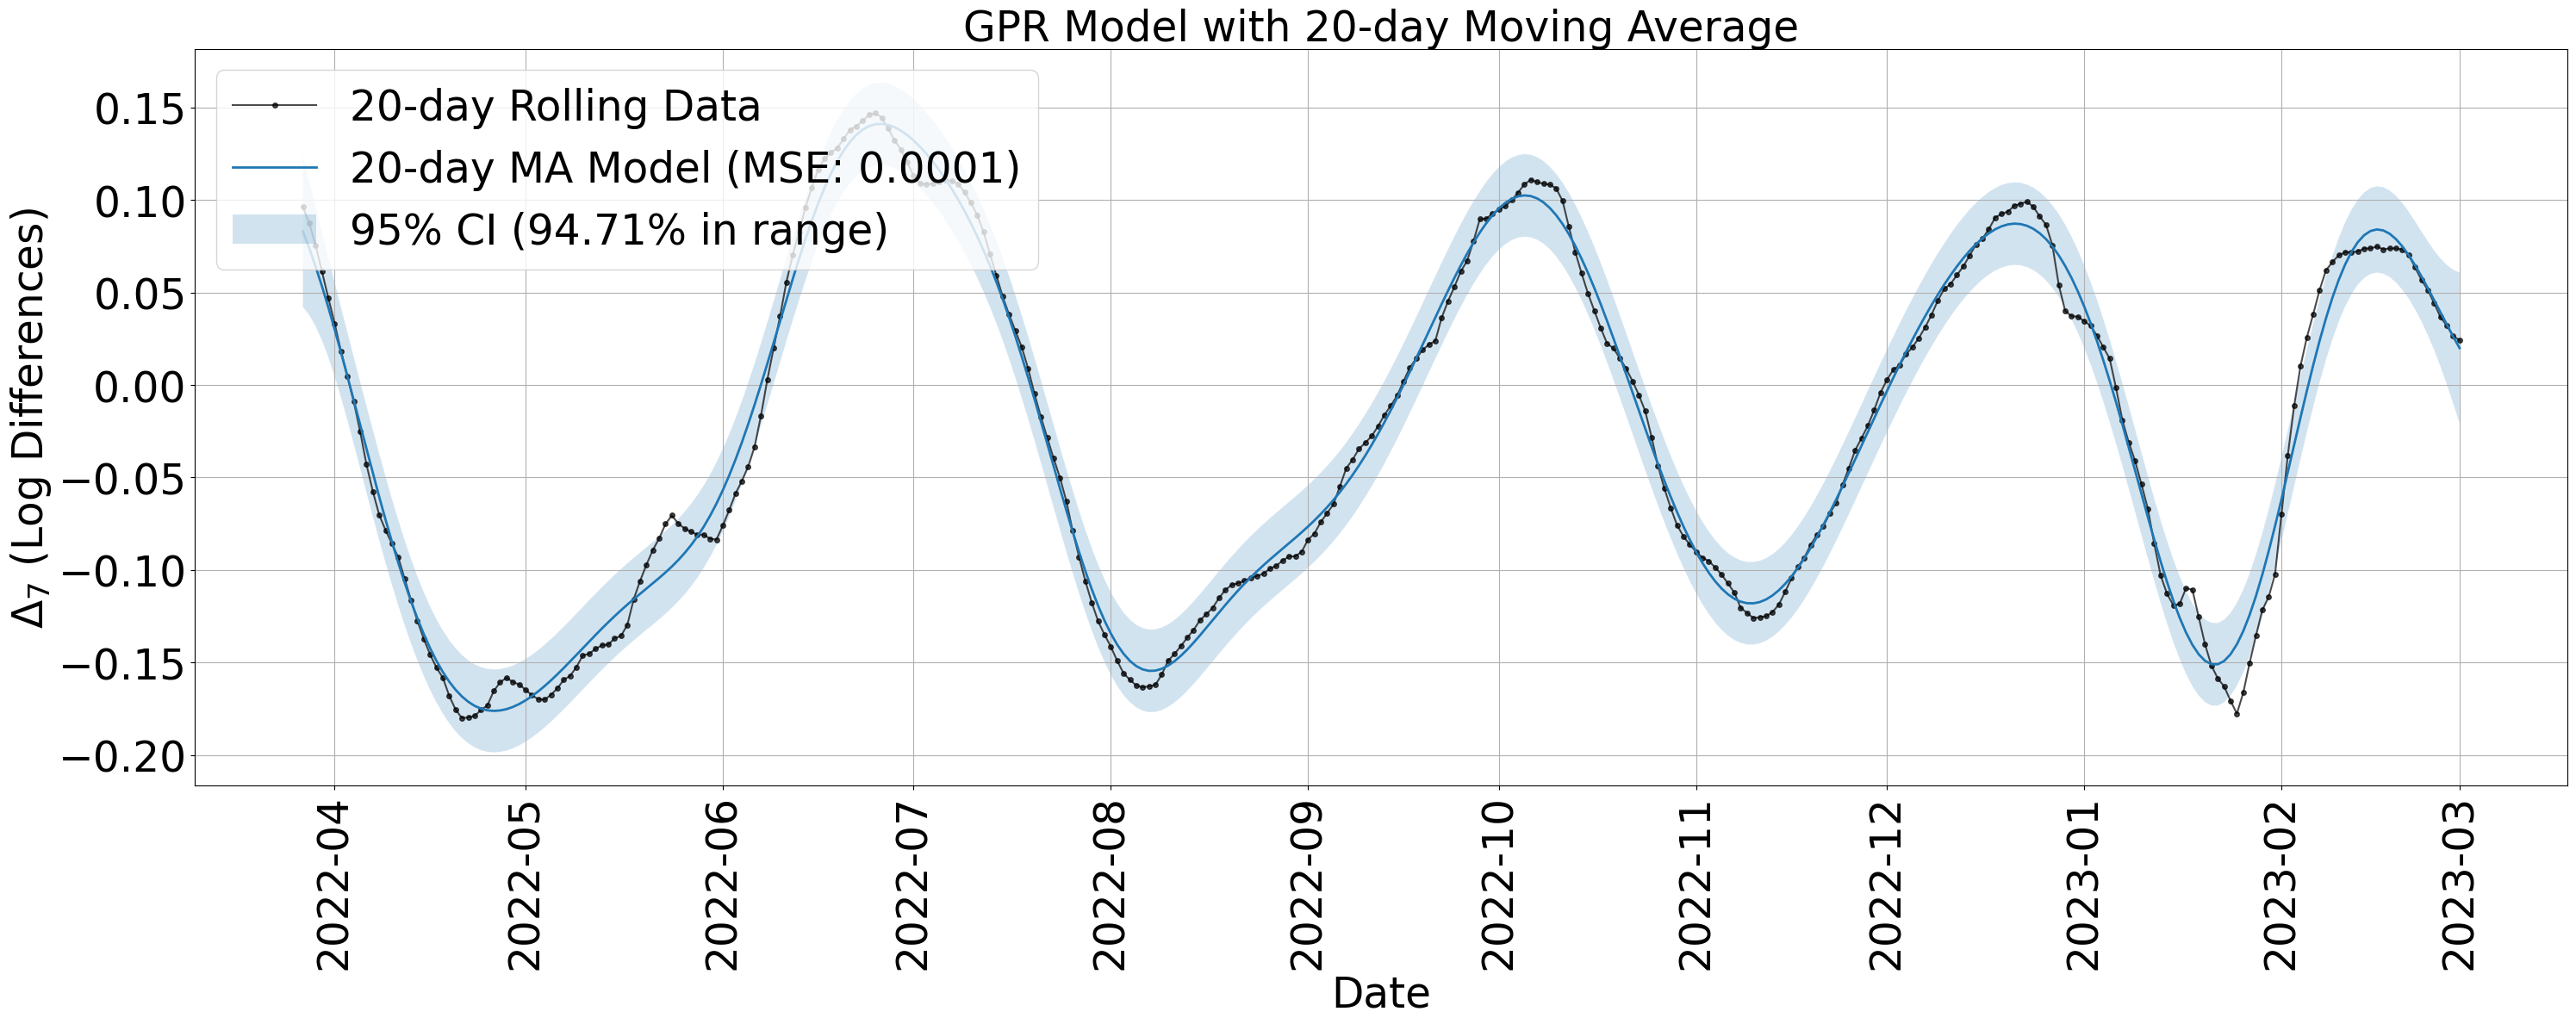

Window Size: 30 days
  MSE: 0.0001
  Percentage of data within 95% CI: 98.18%


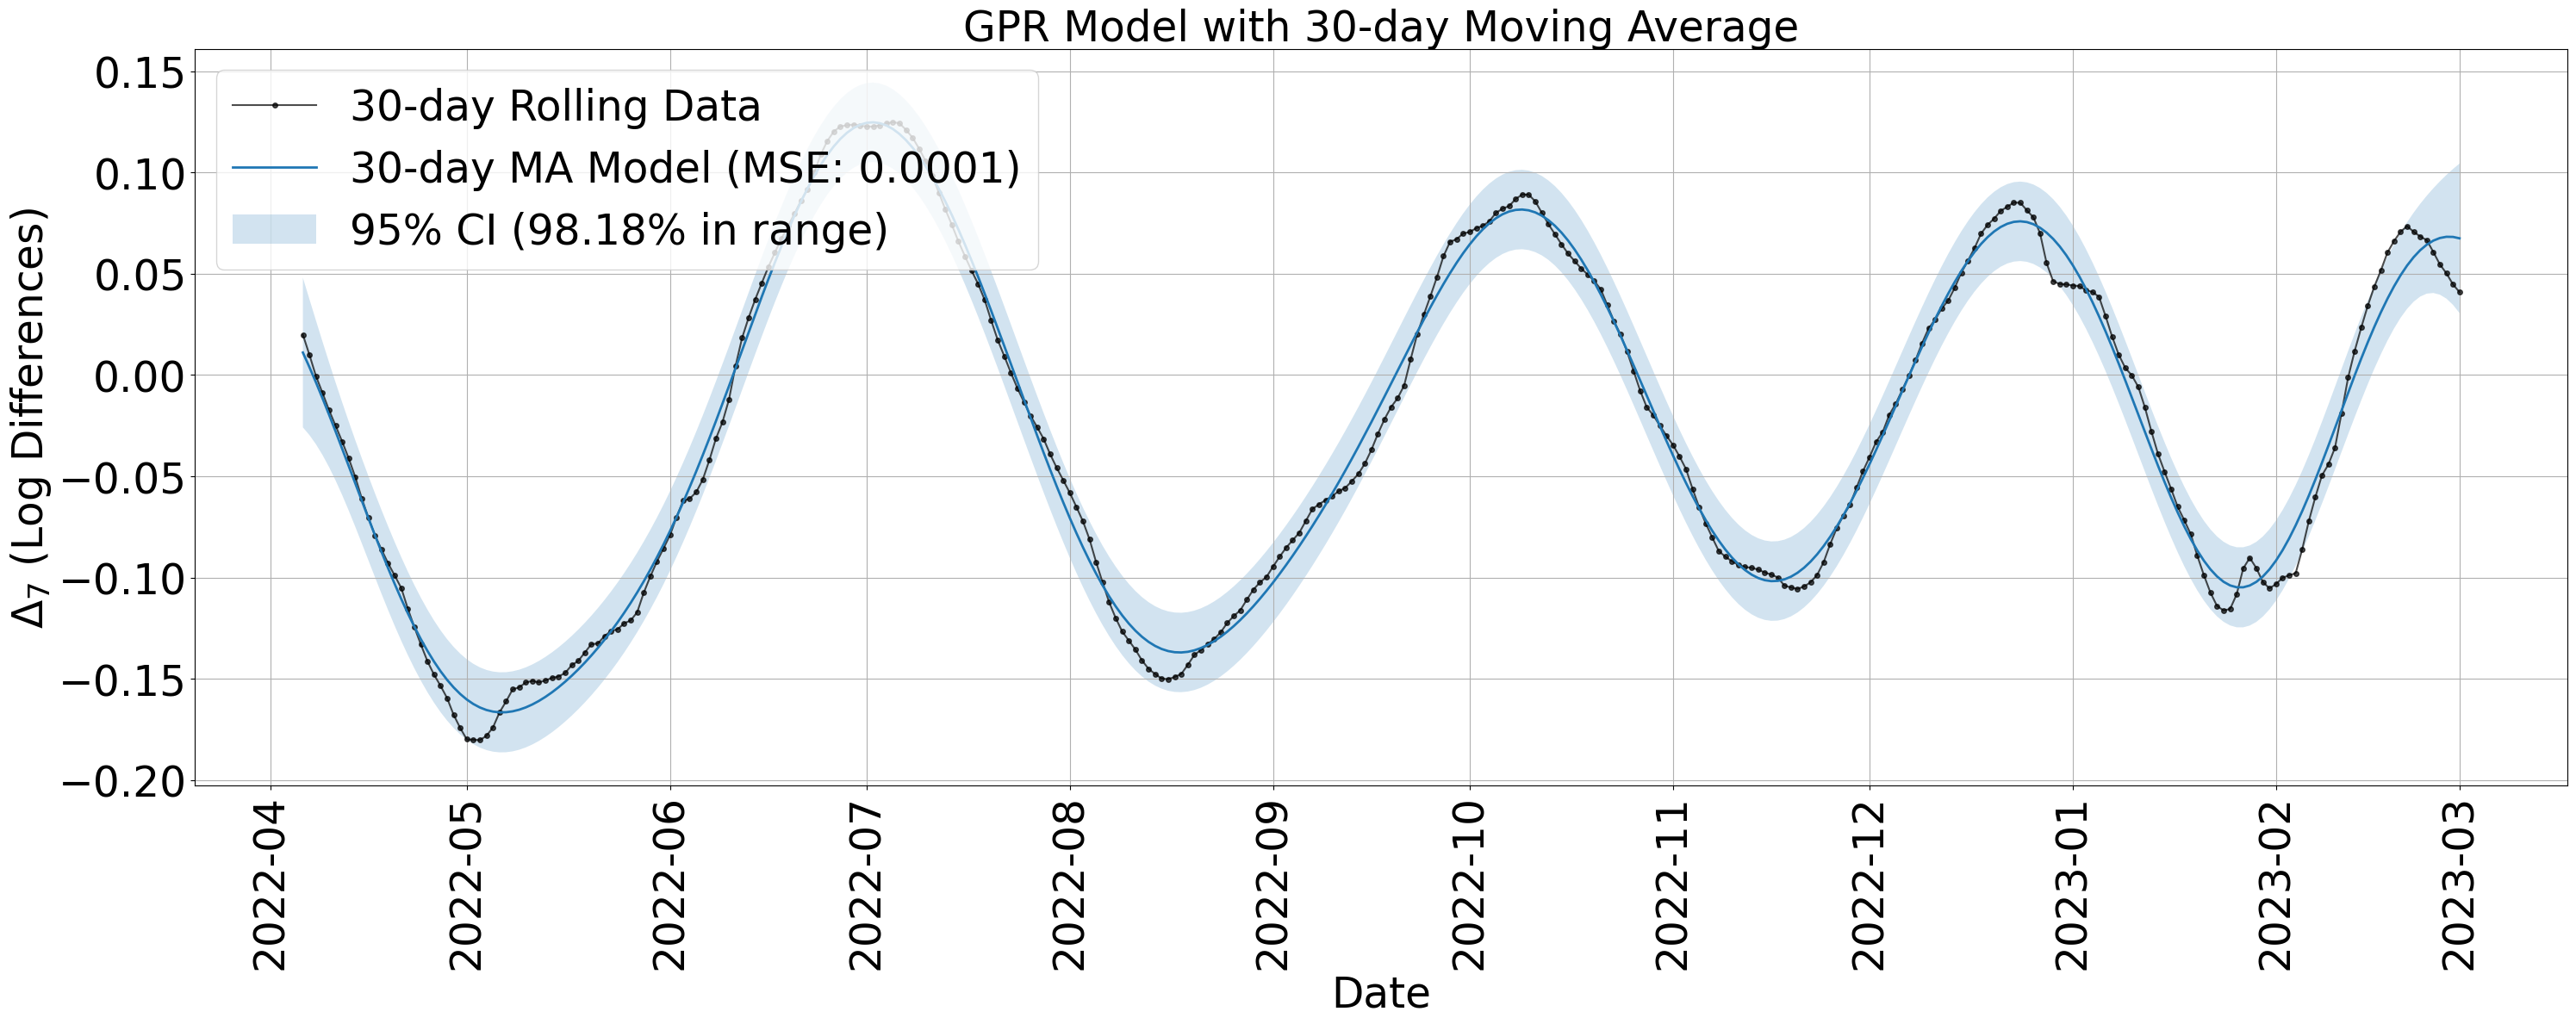

Window Size: 50 days
  MSE: 0.0000
  Percentage of data within 95% CI: 100.00%


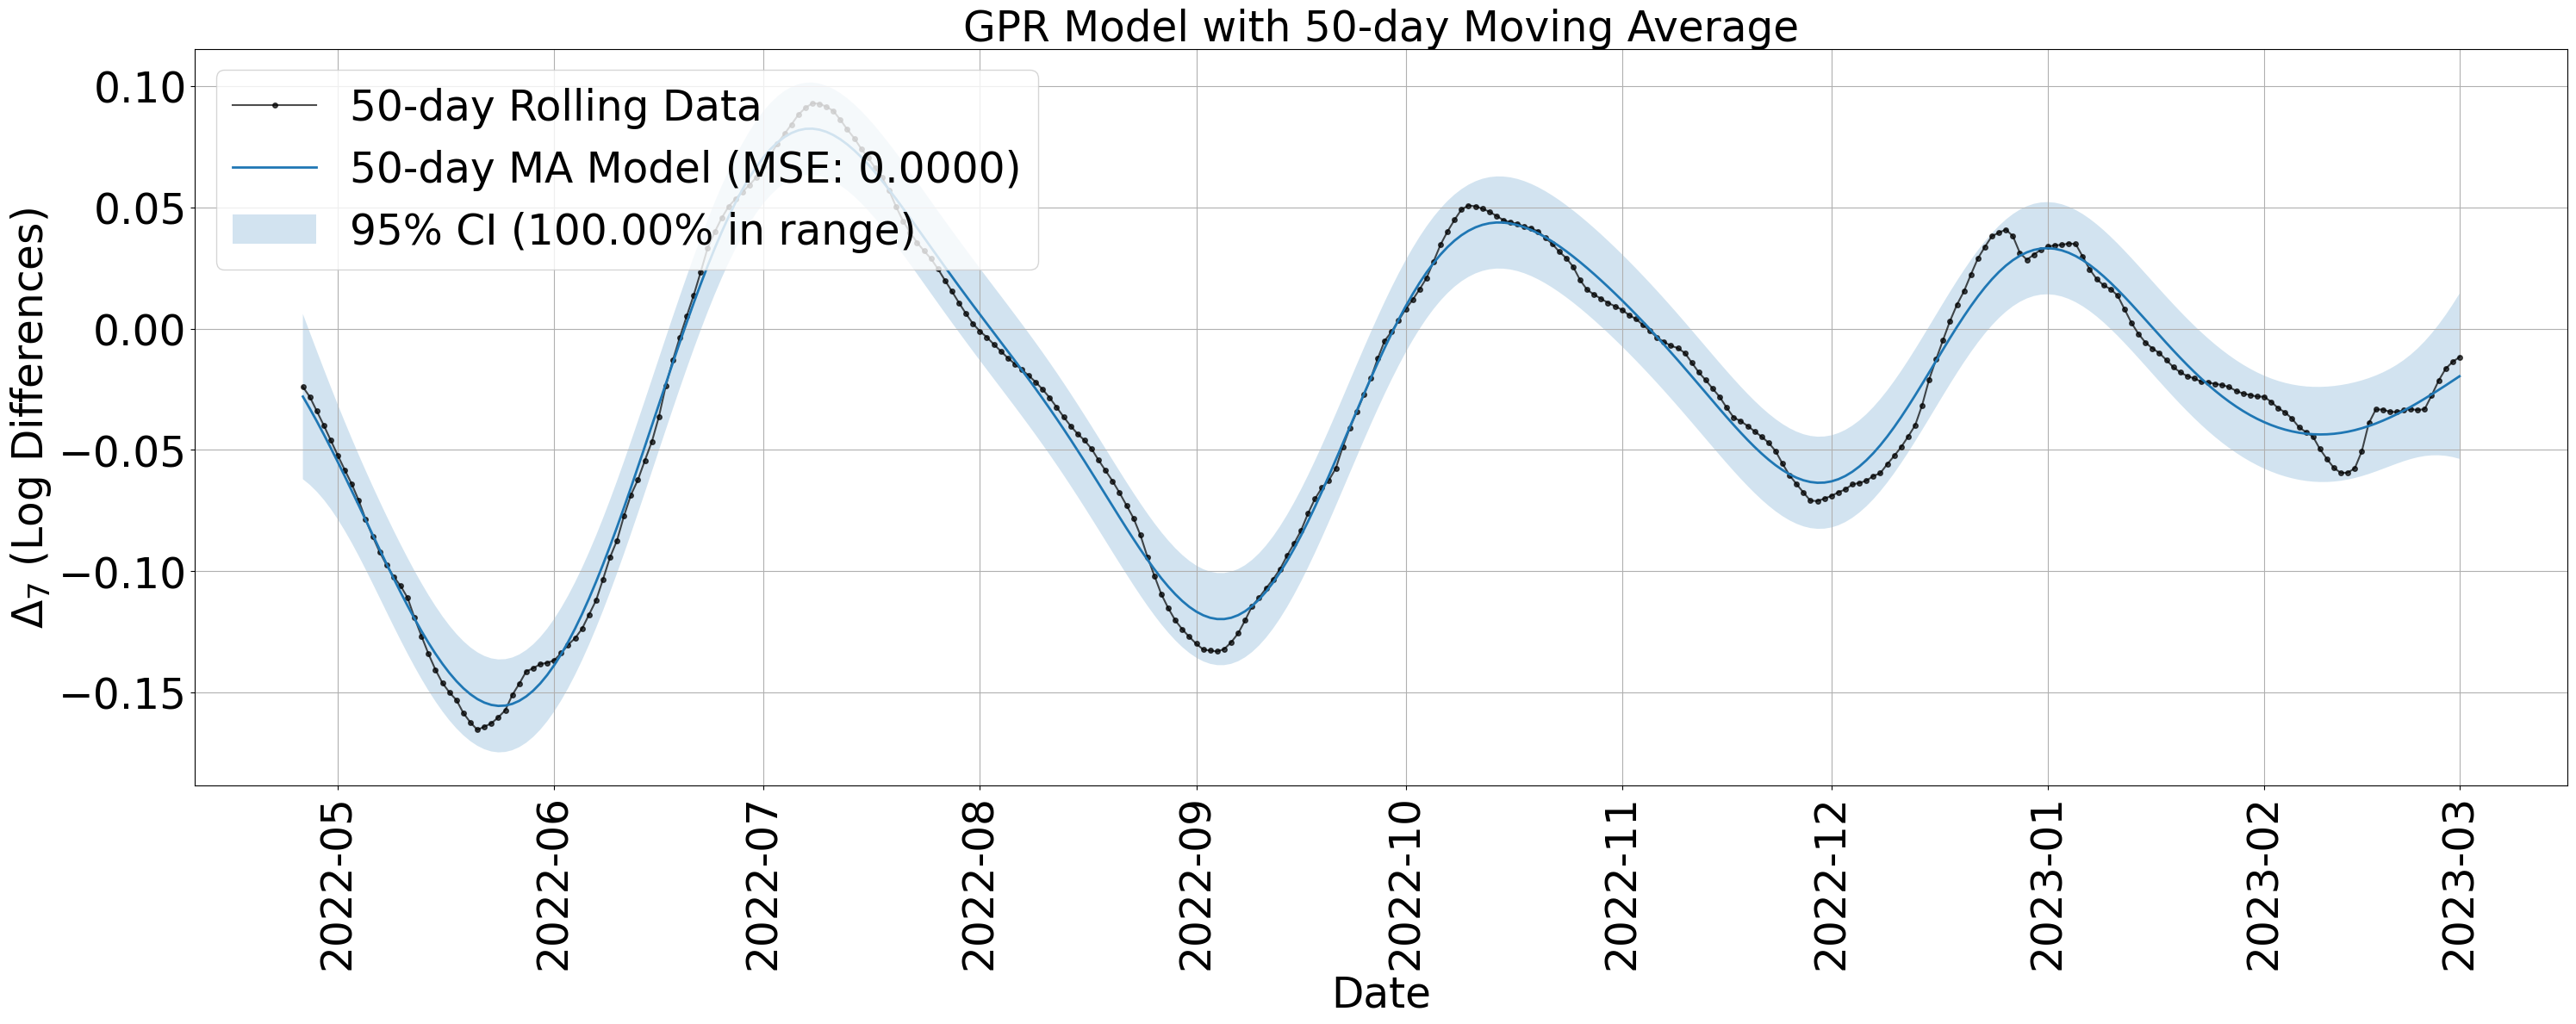

In [2]:
import numpy as np
import gpflow
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from matplotlib.dates import MonthLocator, DateFormatter
import seaborn as sns

# Load the dataset
data_path = 'UK_2022_2023.csv'  # Replace with your local path
data_df = pd.read_csv(data_path)
data_df['Date'] = pd.to_datetime(data_df['Date'], format='%m/%d/%Y')

# Define window sizes and initialize storage for results
window_sizes = [1,3, 5, 10, 20, 30, 50]
gp_models_results = []

# Loop through different window sizes
for window_size in window_sizes:
    # Apply moving average and compute Delta_7
    temp_df = data_df.copy()  # Create a temporary copy for this window size
    temp_df['Cases_MA'] = temp_df['Cases'].rolling(window=window_size).mean()
    temp_df['Delta_7'] = np.log10(temp_df['Cases_MA']) - np.log10(temp_df['Cases_MA'].shift(7))
    temp_df = temp_df.dropna(subset=['Delta_7'])

    # Prepare data
    X = np.arange(len(temp_df)).reshape(-1, 1).astype(np.float64)
    Y = temp_df['Delta_7'].values.reshape(-1, 1).astype(np.float64)

    # Define and train GPR model
    kernel = gpflow.kernels.SquaredExponential()
    model = gpflow.models.GPR(data=(X, Y), kernel=kernel, likelihood=gpflow.likelihoods.Gaussian(variance_lower_bound=0.002))
    opt = gpflow.optimizers.Scipy()
    opt.minimize(model.training_loss, model.trainable_variables)

    # Make predictions
    mean, var = model.predict_f(X)
    mse = mean_squared_error(Y, mean)
    lower_bound = mean.numpy().flatten() - 1.96 * np.sqrt(var.numpy().flatten())
    upper_bound = mean.numpy().flatten() + 1.96 * np.sqrt(var.numpy().flatten())
    within_ci = np.sum((Y.flatten() >= lower_bound) & (Y.flatten() <= upper_bound)) / len(Y) * 100

    # Store results
    gp_models_results.append((window_size, temp_df['Date'], temp_df['Delta_7'], mean.numpy().flatten(), var.numpy().flatten(), mse, within_ci))

# Plot each model separately using its specific rolling window data
for window_size, dates, actual_vals, mean_vals, var_vals, mse, within_ci in gp_models_results:
    plt.figure(figsize=(30, 12))

    # Plot the actual data used for training
    plt.plot(dates, actual_vals, 'o-', label=f'{window_size}-day Rolling Data', color='black', markersize=4, alpha=0.7)

    # Plot the GPR model predictions
    plt.plot(dates, mean_vals, label=f'{window_size}-day MA Model (MSE: {mse:.4f})', linewidth=2)
    plt.fill_between(dates, 
                     mean_vals - 1.96 * np.sqrt(var_vals), 
                     mean_vals + 1.96 * np.sqrt(var_vals), 
                     alpha=0.2, label=f'95% CI ({within_ci:.2f}% in range)')

    # Formatting
    plt.gca().xaxis.set_major_locator(MonthLocator())
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    plt.title(f'GPR Model with {window_size}-day Moving Average', fontsize=35)
    plt.xlabel('Date', fontsize=35)
    plt.ylabel('$\Delta_7$ (Log Differences)', fontsize=35)
    plt.legend(fontsize=35, loc='upper left')
    plt.grid(True)
    plt.xticks(fontsize=35, rotation=90)
    plt.yticks(fontsize=35)
    plt.tight_layout()
    # Print MSE and CI stats
    print(f"Window Size: {window_size} days")
    print(f"  MSE: {mse:.4f}")
    print(f"  Percentage of data within 95% CI: {within_ci:.2f}%")
    # Save the plot
    plt.savefig(f'GPR_Model_{window_size}_Day_MA_MModeling.png', dpi=300, bbox_inches='tight')
    plt.show()

2. The sensitivity analysis of modeling the spread using smoothing windows of 30 days with a $\{3,7,14,28\}$-day difference on the logarithmic
scale of infected case is presented in the following figures.

<>:71: SyntaxWarning: invalid escape sequence '\D'
<>:71: SyntaxWarning: invalid escape sequence '\D'
C:\Users\bshe6\AppData\Local\Temp\1\ipykernel_1028\1540962891.py:71: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta_{lag}$ (Log Differences)', fontsize=24)


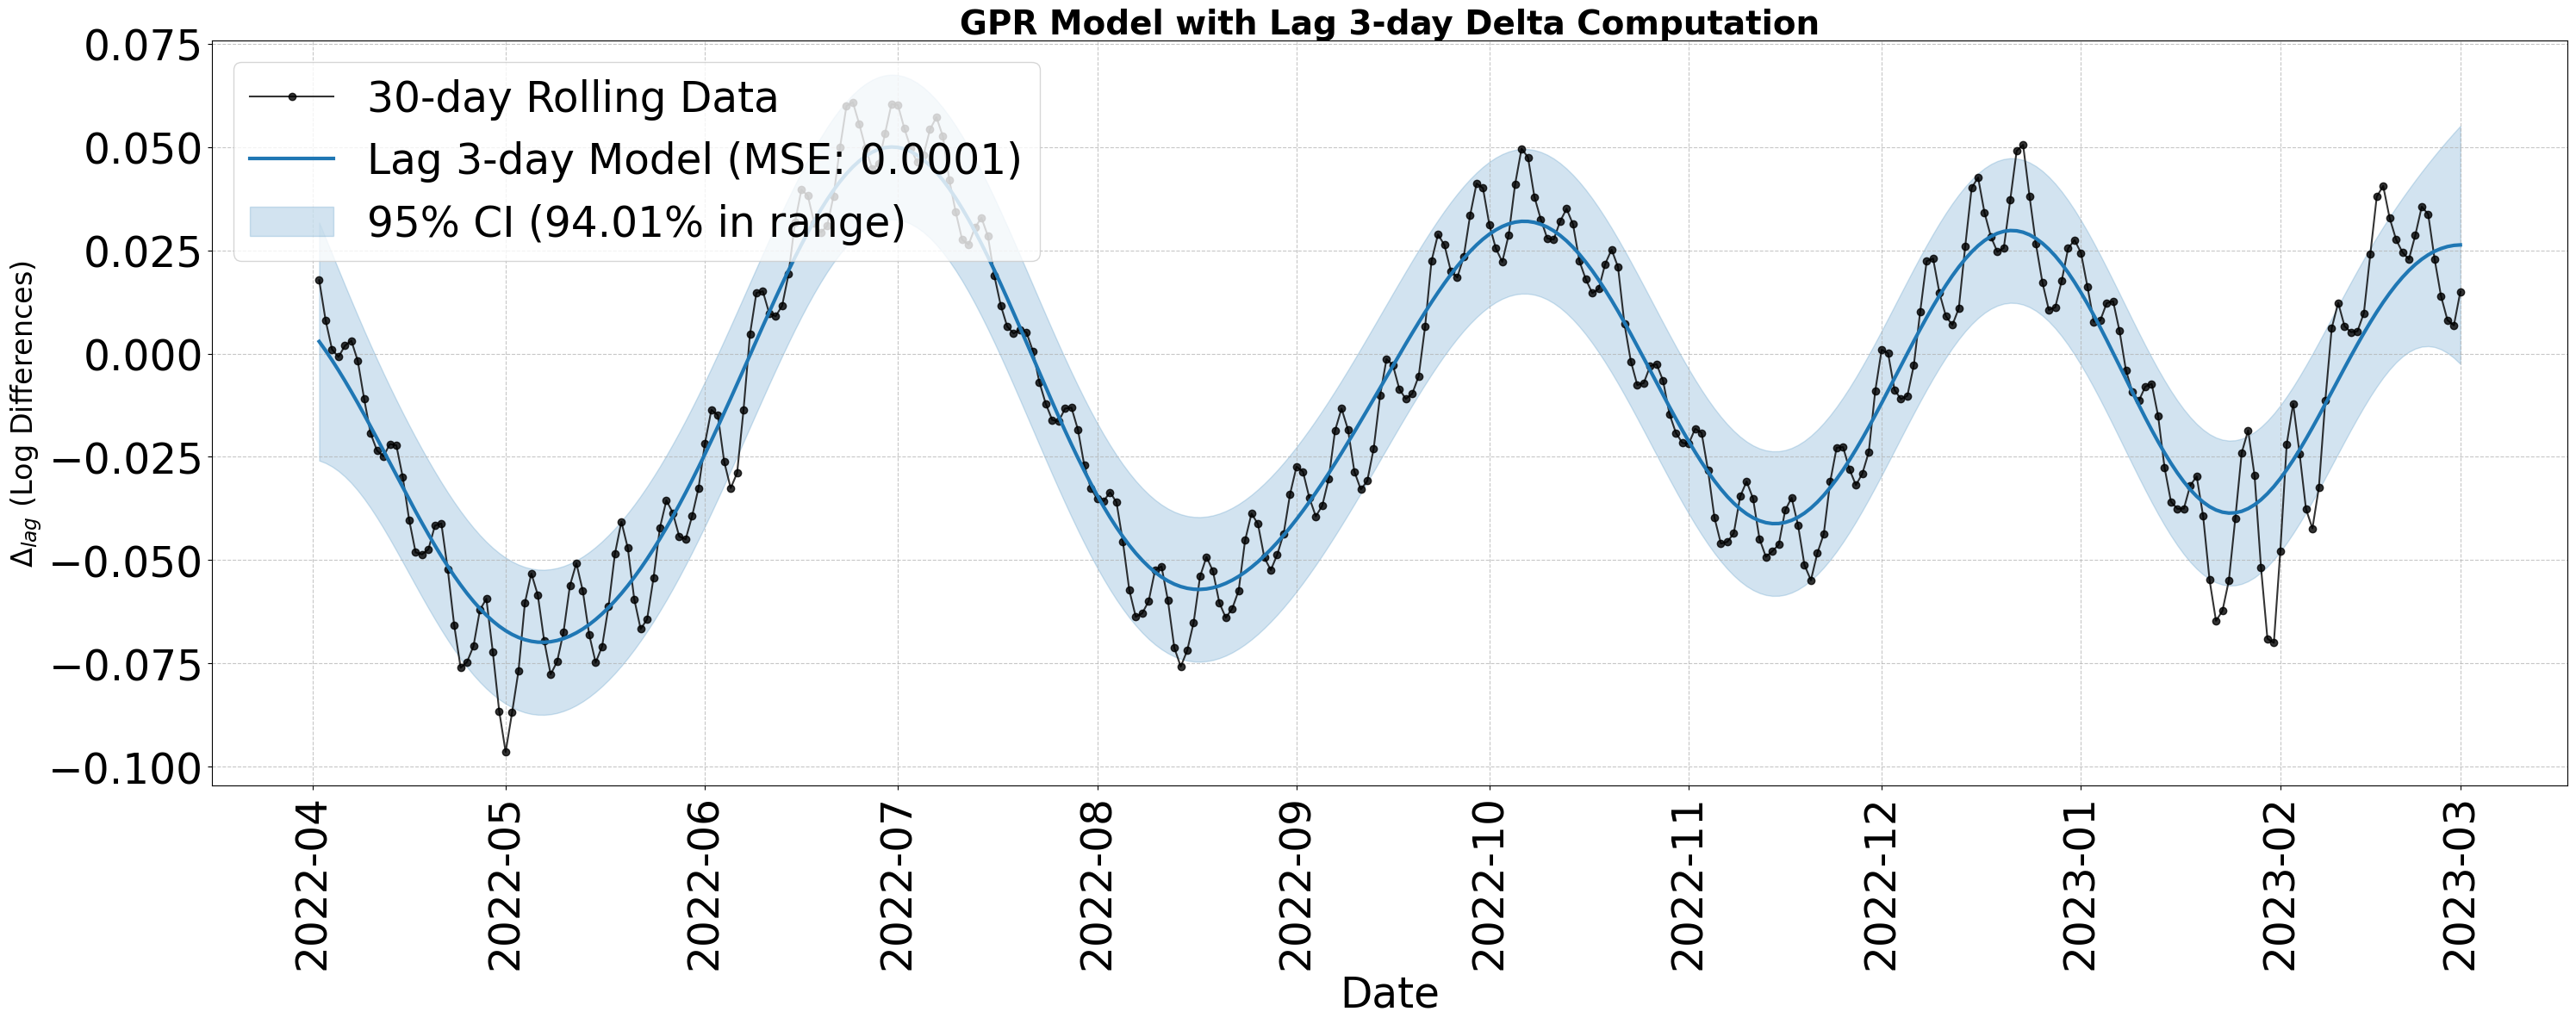

Lag: 3 days
  MSE: 0.0001
  Percentage of data within 95% CI: 94.01%


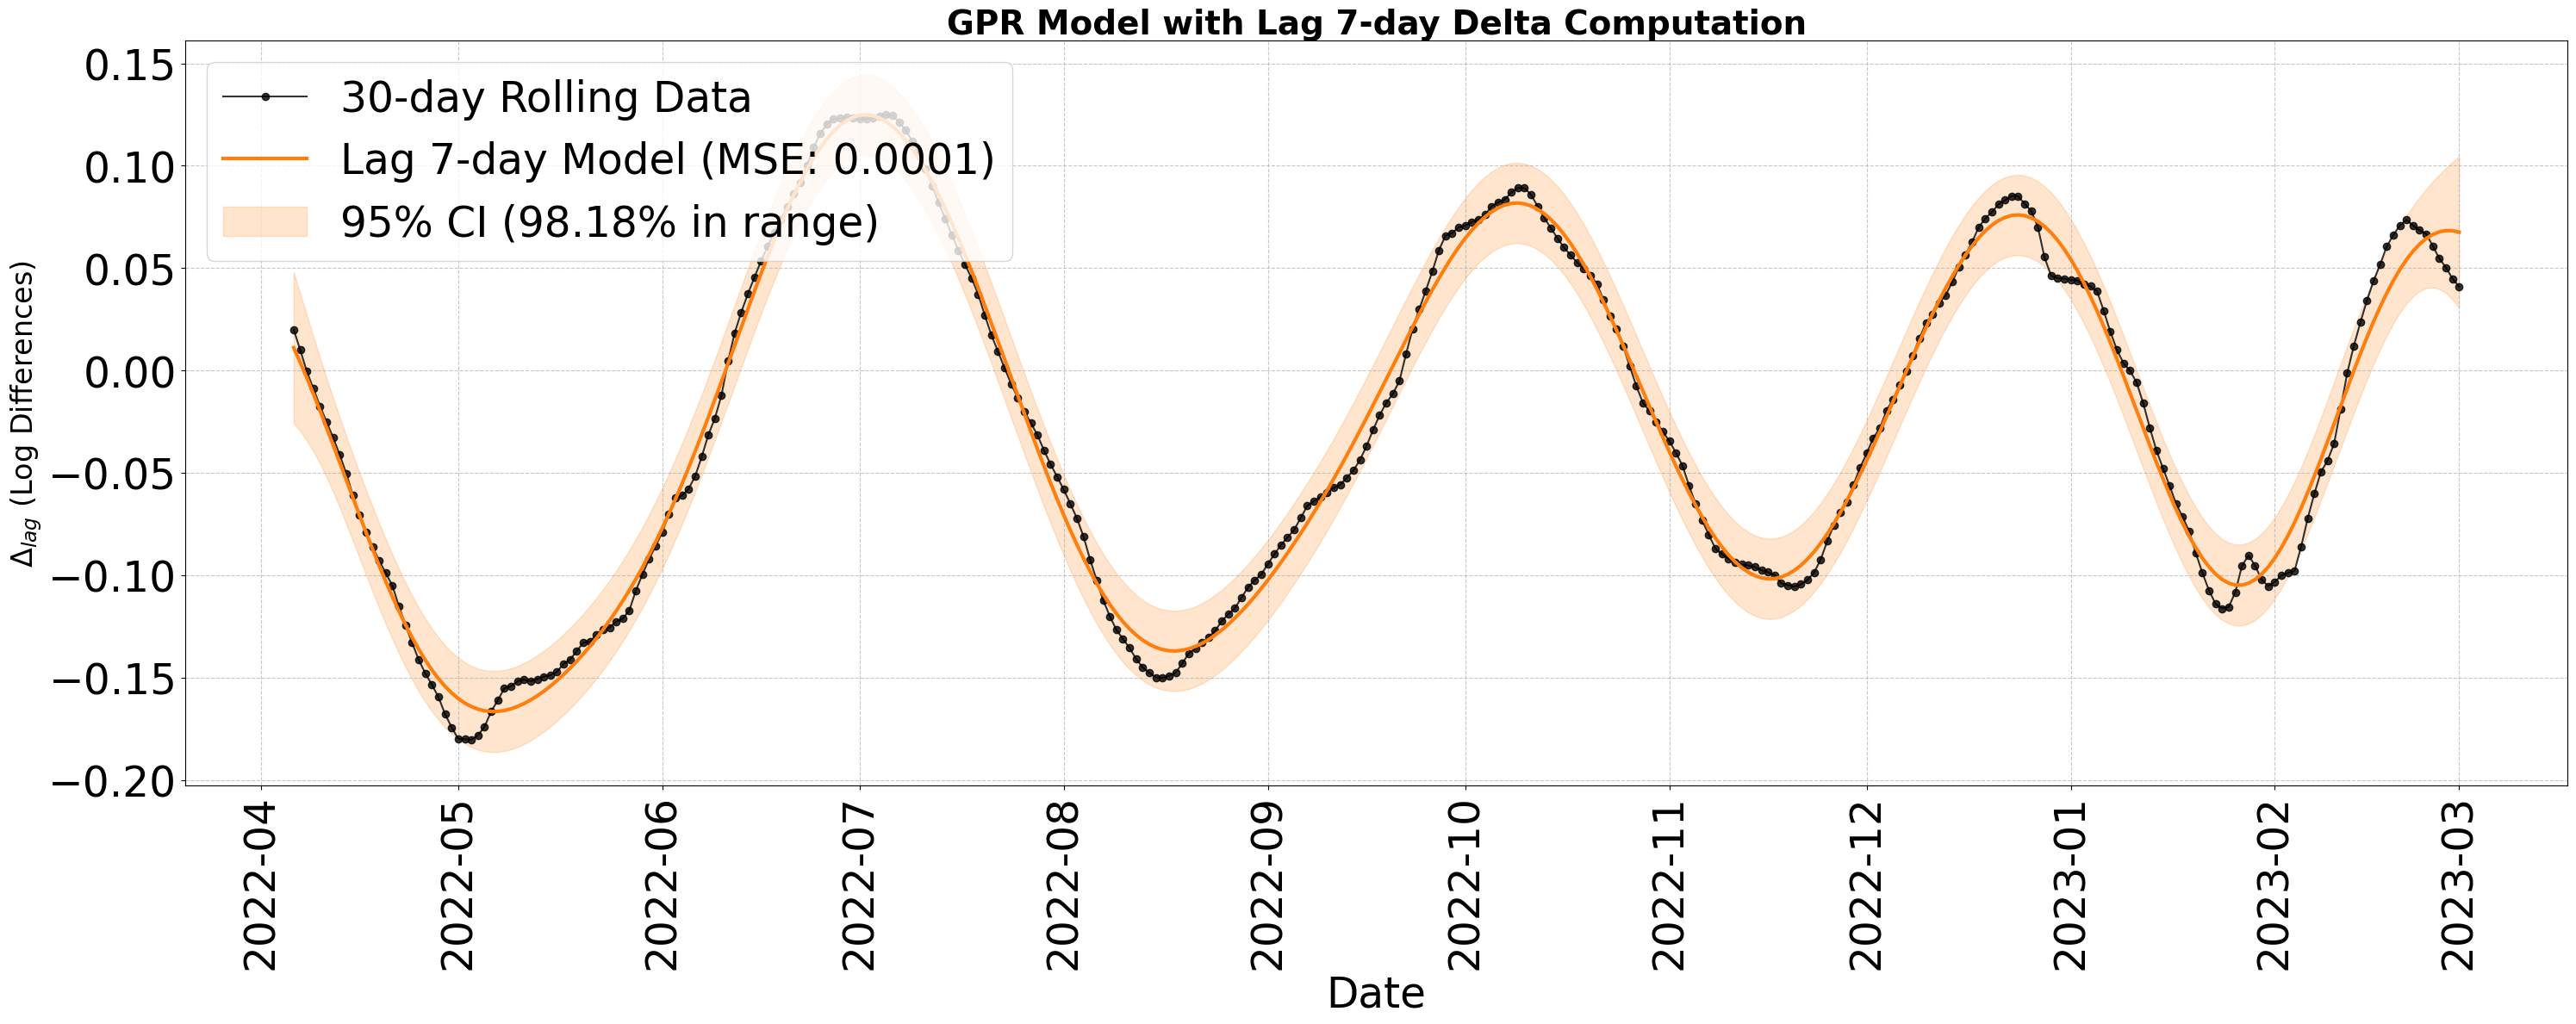

Lag: 7 days
  MSE: 0.0001
  Percentage of data within 95% CI: 98.18%


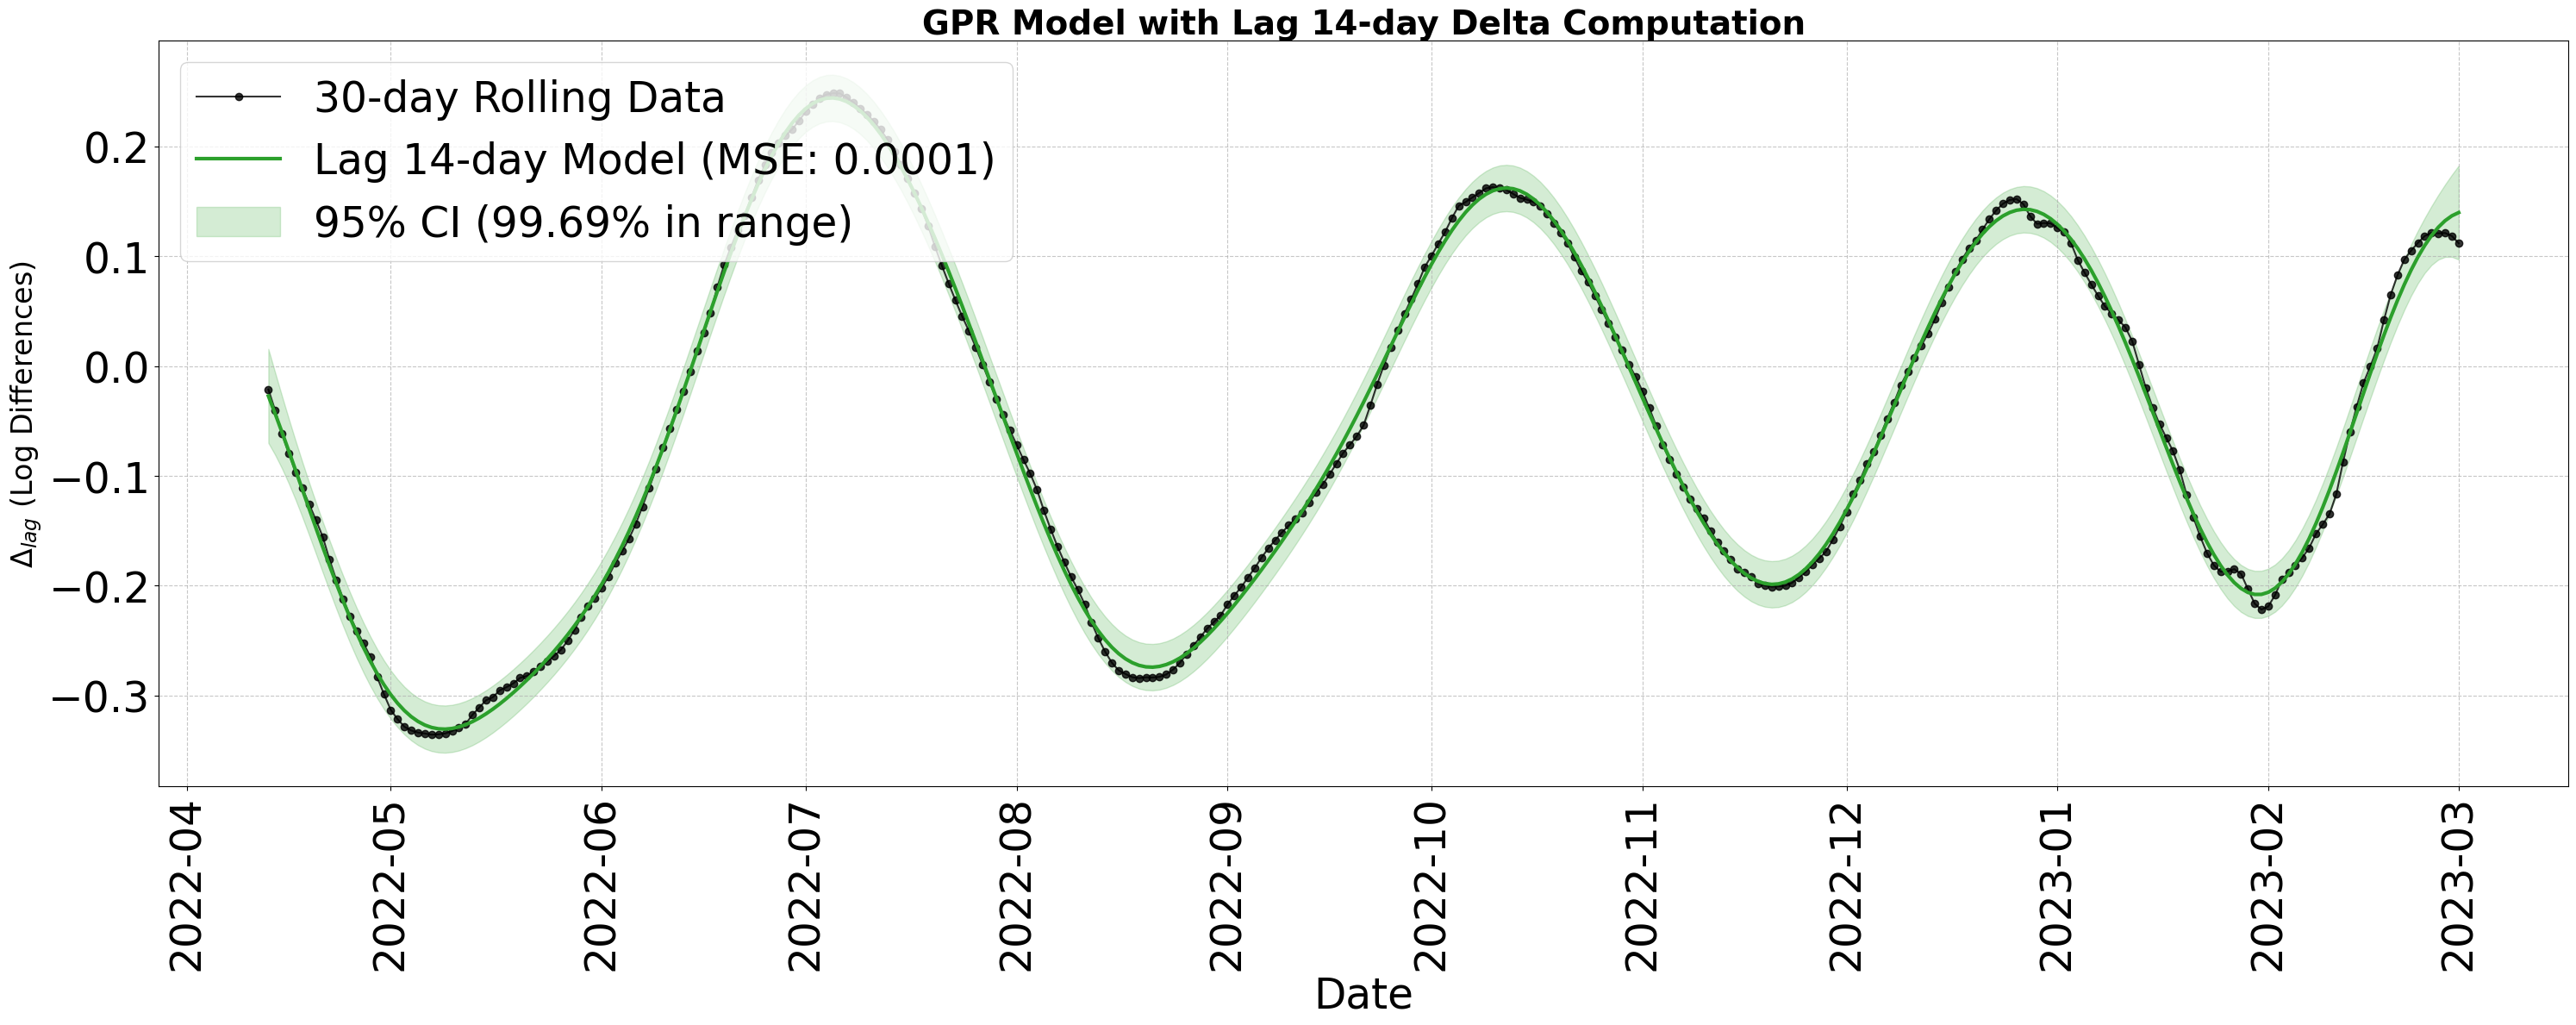

Lag: 14 days
  MSE: 0.0001
  Percentage of data within 95% CI: 99.69%


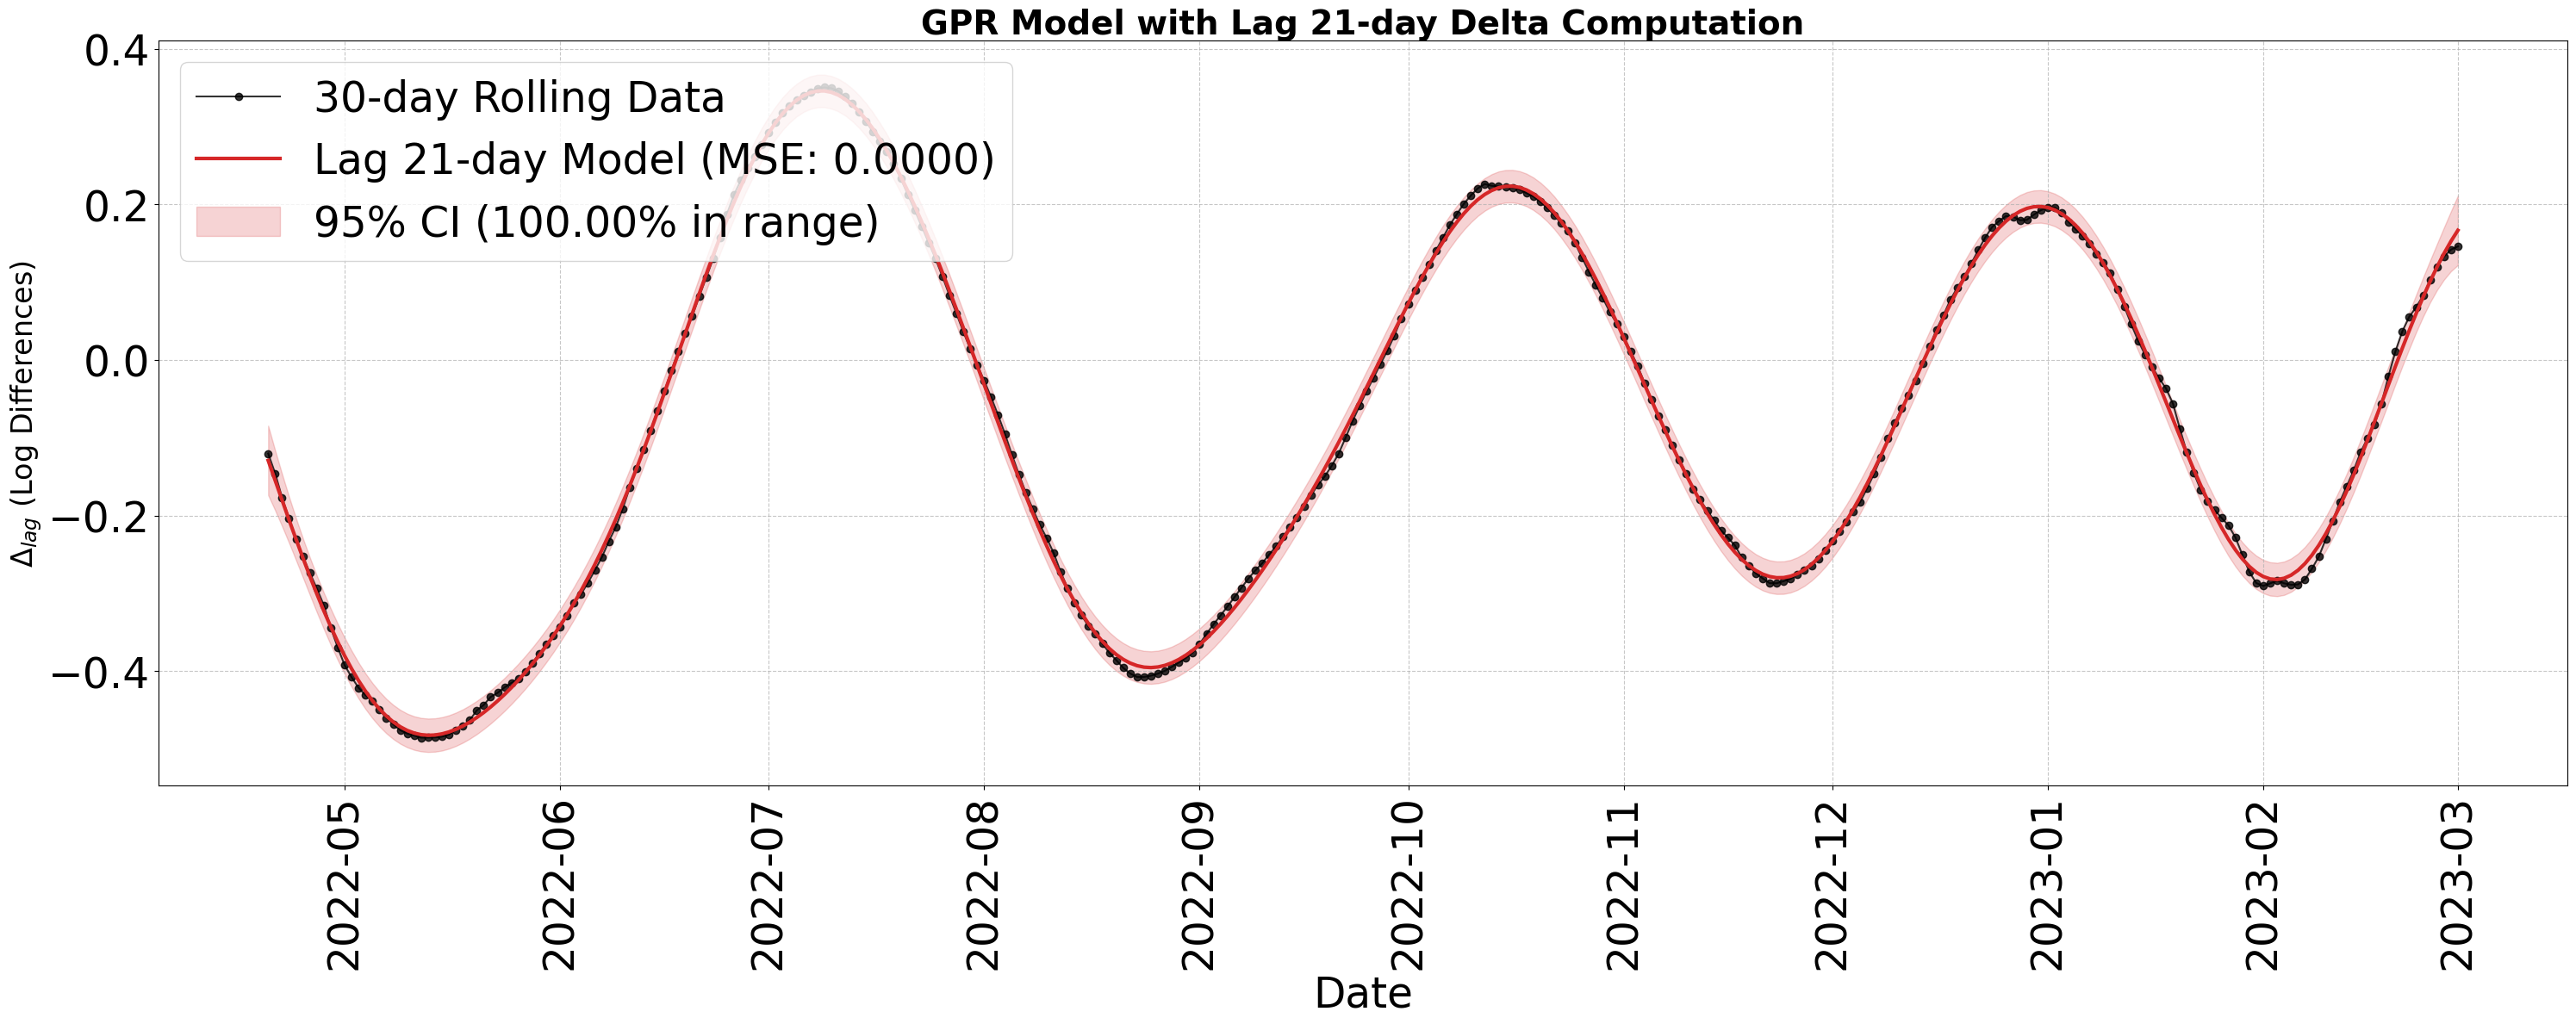

Lag: 21 days
  MSE: 0.0000
  Percentage of data within 95% CI: 100.00%


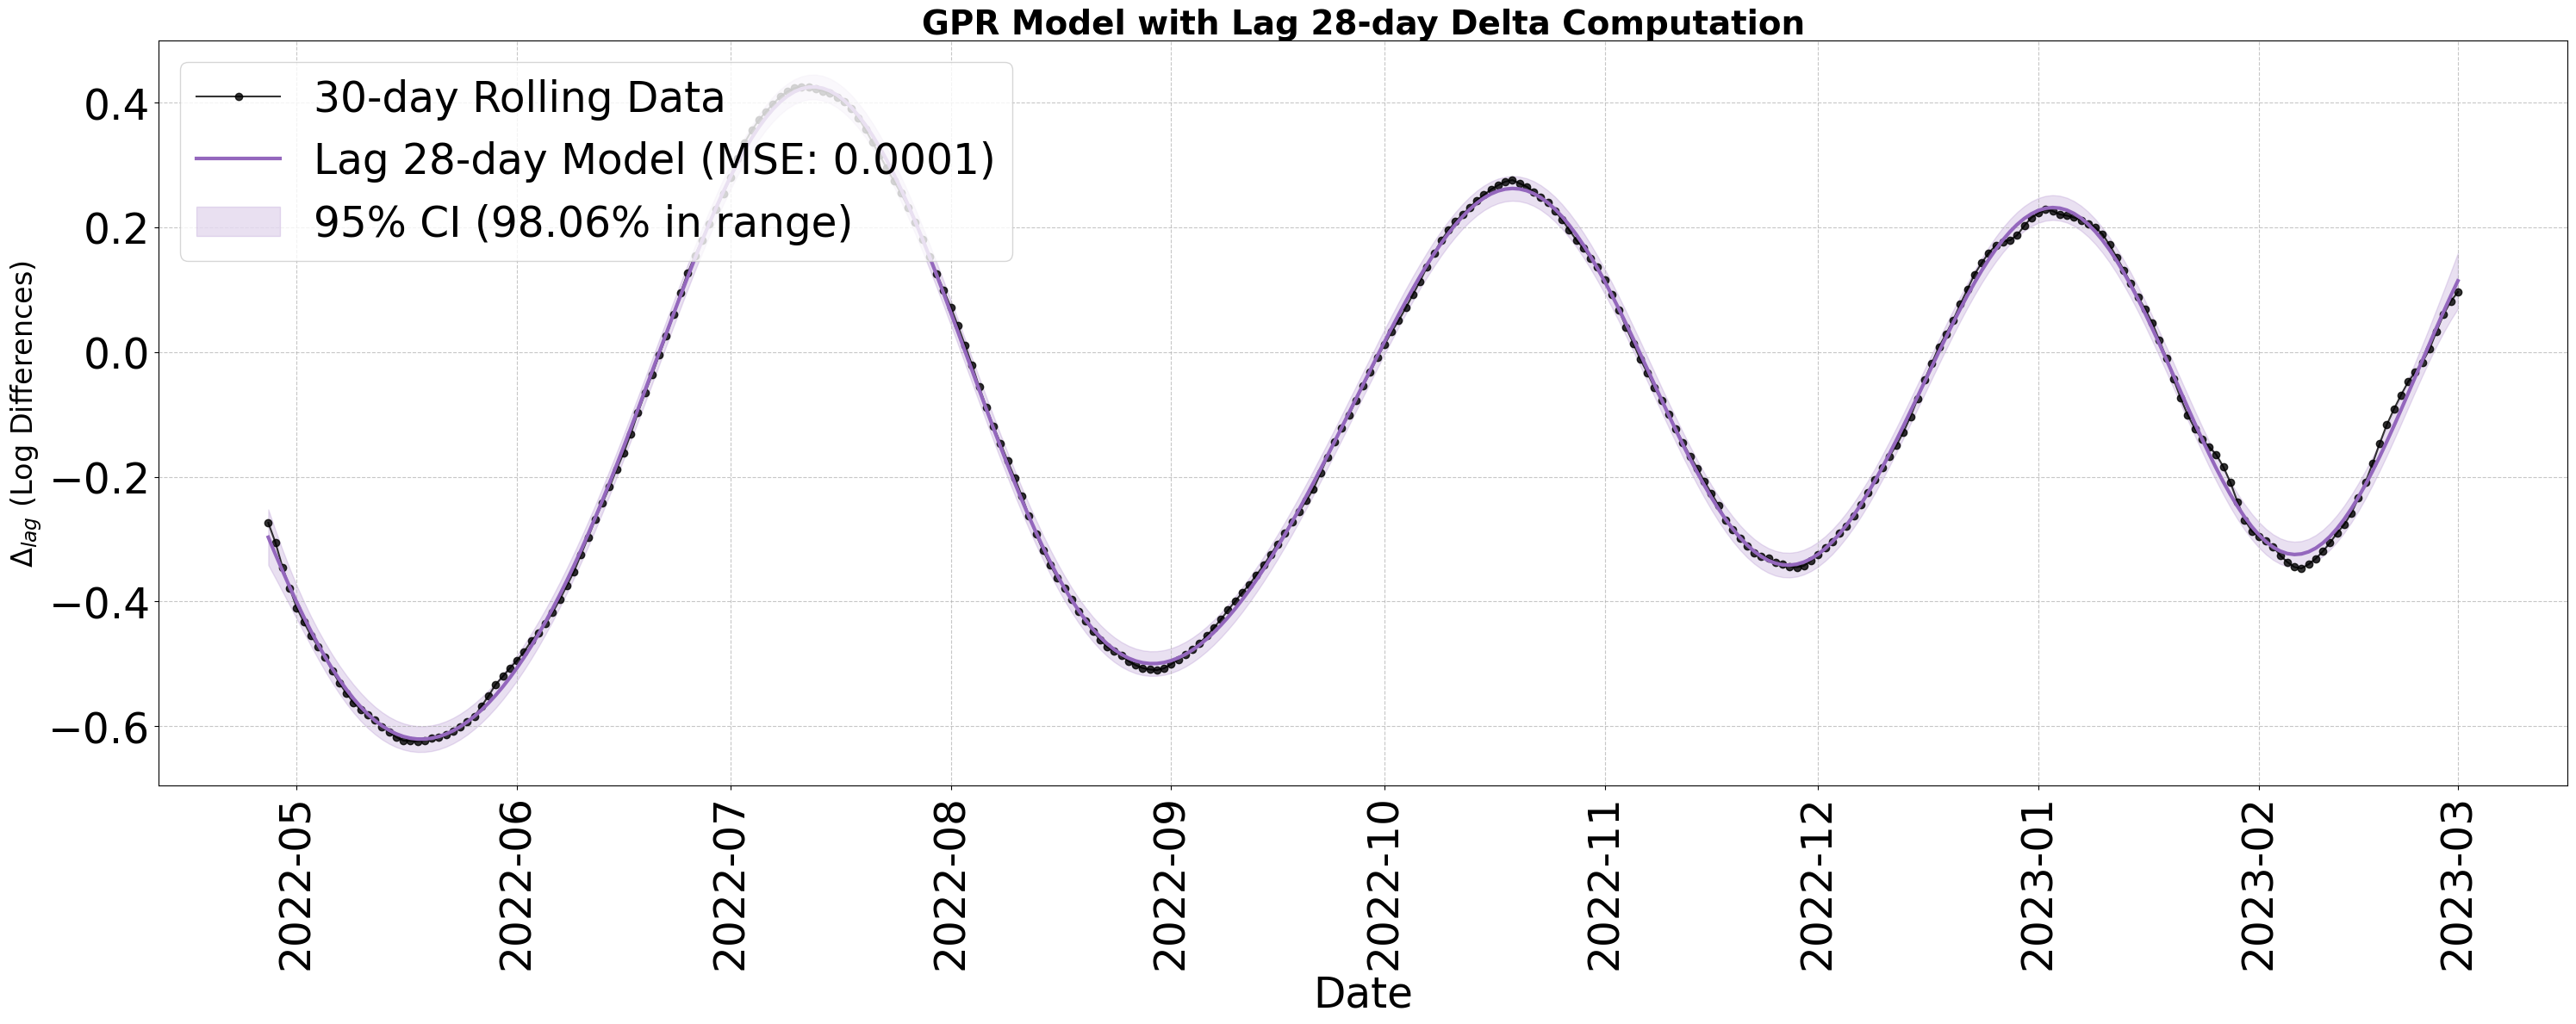

Lag: 28 days
  MSE: 0.0001
  Percentage of data within 95% CI: 98.06%


In [4]:
import numpy as np
import gpflow
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from matplotlib.dates import MonthLocator, DateFormatter
import seaborn as sns

# Load the dataset
data_path = 'UK_2022_2023.csv'  # Replace with your local path
data_df = pd.read_csv(data_path)
data_df['Date'] = pd.to_datetime(data_df['Date'], format='%m/%d/%Y')

# Fixed window size
window_size = 30
lags = [3, 7, 14, 21, 28]  # Different lag values for Delta computation

# Initialize storage for results
gp_models_results = []

# Use seaborn's color palette for distinct colors
colors = sns.color_palette('tab10', len(lags))

# Loop through different lag values
for lag in lags:
    # Apply moving average and compute Delta with the current lag
    temp_df = data_df.copy()  # Create a temporary copy for this lag value
    temp_df['Cases_MA'] = temp_df['Cases'].rolling(window=window_size).mean()
    temp_df['Delta_7'] = np.log10(temp_df['Cases_MA']) - np.log10(temp_df['Cases_MA'].shift(lag))
    temp_df = temp_df.dropna(subset=['Delta_7'])

    # Prepare data
    X = np.arange(len(temp_df)).reshape(-1, 1).astype(np.float64)
    Y = temp_df['Delta_7'].values.reshape(-1, 1).astype(np.float64)

    # Define and train GPR model
    kernel = gpflow.kernels.SquaredExponential()
    model = gpflow.models.GPR(data=(X, Y), kernel=kernel, likelihood=gpflow.likelihoods.Gaussian(variance_lower_bound=0.002))
    opt = gpflow.optimizers.Scipy()
    opt.minimize(model.training_loss, model.trainable_variables)

    # Make predictions
    mean, var = model.predict_f(X)
    mse = mean_squared_error(Y, mean)
    lower_bound = mean.numpy().flatten() - 1.96 * np.sqrt(var.numpy().flatten())
    upper_bound = mean.numpy().flatten() + 1.96 * np.sqrt(var.numpy().flatten())
    within_ci = np.sum((Y.flatten() >= lower_bound) & (Y.flatten() <= upper_bound)) / len(Y) * 100

    # Store results
    gp_models_results.append((lag, temp_df['Date'], temp_df['Delta_7'], mean.numpy().flatten(), var.numpy().flatten(), mse, within_ci))

# Plot each model separately for different lag values
for i, (lag, dates, actual_vals, mean_vals, var_vals, mse, within_ci) in enumerate(gp_models_results):
    plt.figure(figsize=(30, 12))

    # Plot the actual data used for training
    plt.plot(dates, actual_vals, 'o-', label=f'{window_size}-day Rolling Data', color='black', markersize=6, alpha=0.8)

    # Plot the GPR model predictions
    plt.plot(dates, mean_vals, label=f'Lag {lag}-day Model (MSE: {mse:.4f})', linewidth=3, color=colors[i])
    plt.fill_between(dates, 
                     mean_vals - 1.96 * np.sqrt(var_vals), 
                     mean_vals + 1.96 * np.sqrt(var_vals), 
                     alpha=0.2, color=colors[i], label=f'95% CI ({within_ci:.2f}% in range)')

    # Formatting
    plt.gca().xaxis.set_major_locator(MonthLocator())
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    plt.title(f'GPR Model with Lag {lag}-day Delta Computation', fontsize=28, fontweight='bold')
    plt.xlabel('Date', fontsize=35)
    plt.ylabel('$\Delta_{lag}$ (Log Differences)', fontsize=24)
    plt.xticks(fontsize=35, rotation=90)
    plt.yticks(fontsize=35)
    plt.legend(fontsize=35, loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the figure
    plt.savefig(f'GPR_Model_Lag_{lag}_Day.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print MSE and CI stats
    print(f"Lag: {lag} days")
    print(f"  MSE: {mse:.4f}")
    print(f"  Percentage of data within 95% CI: {within_ci:.2f}%")
